# Data Mining Homework 3
## Question 8
### Mohammad Bahrami - 9724133

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [74]:
target_df = pd.read_csv('actual.csv', index_col=0)
X_train = pd.read_csv('data_set_ALL_AML_train.csv')
X_test = pd.read_csv('data_set_ALL_AML_test.csv')

### Part a

In [75]:
X_train.drop(X_train.columns[np.char.startswith(np.array(X_train.columns, dtype=str), 'call')], axis=1, inplace=True)
X_test.drop(X_test.columns[np.char.startswith(np.array(X_test.columns, dtype=str), 'call')], axis=1, inplace=True)

X_train.drop(['Gene Description', 'Gene Accession Number'], axis=1, inplace=True)
X_test.drop(['Gene Description', 'Gene Accession Number'], axis=1, inplace=True)

### Part b

In [76]:
X_train = X_train.T
X_test = X_test.T

X_train.index = X_train.index.astype(int)
X_test.index = X_test.index.astype(int)


X_train.loc[:, 'label'] = target_df.loc[X_train.index.astype(int), 'cancer']
X_test['label'] = target_df.loc[X_test.index.astype(int), 'cancer']

### Part c

In [81]:
from sklearn.manifold import TSNE
tsne_df = pd.DataFrame(
    TSNE(n_components=2).fit_transform(X_train.loc[:, X_train.columns != 'label']),
    index=X_train.index
)
tsne_df['label'] = X_train['label']

/home/indirected/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/indirected/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


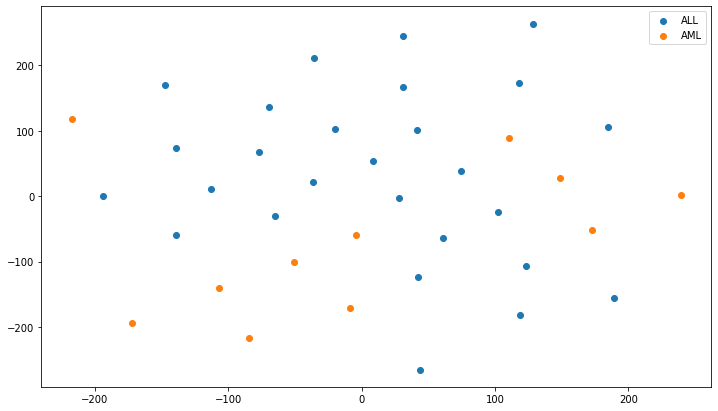

In [87]:
fig, ax = plt.subplots()
ax.scatter(
    tsne_df.loc[tsne_df['label'] == 'ALL', 0],
    tsne_df.loc[tsne_df['label'] == 'ALL', 1],
    label = 'ALL'
)
ax.scatter(
    tsne_df.loc[tsne_df['label'] == 'AML', 0],
    tsne_df.loc[tsne_df['label'] == 'AML', 1],
    label = 'AML'
)
ax.legend()
fig.set_size_inches((12, 7))

### Part d

In [88]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train.loc[:, X_train.columns != 'label'])
X_train.loc[:, X_train.columns != 'label'] = scaler.transform(X_train.loc[:, X_train.columns != 'label'])
X_test.loc[:, X_test.columns != 'label'] = scaler.transform(X_test.loc[:, X_test.columns != 'label'])

In [112]:
from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier().fit(X_train.loc[:, X_train.columns != 'label'], X_train['label'])
print(f'MLP Accuracy on the Test Set: {classifier.score(X_test.loc[:, X_test.columns != "label"], X_test["label"])*100: .2f}%')

MLP Accuracy on the Test Set:  91.18%


### Part e

In [96]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3).fit(X_train.loc[:, X_train.columns != 'label'])
pca_train = pca.transform(X_train.loc[:, X_train.columns != 'label'])
pca_test = pca.transform(X_test.loc[:, X_test.columns != 'label'])

In [119]:
classifier = MLPClassifier(max_iter=500).fit(pca_train, X_train['label'])
print(f'MLP Accuracy on the Test Set: {classifier.score(pca_test, X_test["label"])*100: .2f}%')

MLP Accuracy on the Test Set:  85.29%
